## Esercizio 3
L' obbiettivo è quello di prezzare un opzione Europea di tipo call e di tipo put tramite metodi monte carlo e di confrontare i risultati con la soluzione analitica di Black-Scholes. 

Rientriamo nelle ipotesi fatte da Black-Sholes:
1. Il mercato è efficiente senza frizione, a liquidità infinita.

2. Il prezzo di un asset è stocastico e segue un moto Browniano con tasso di interesse fisso risk-free r e volatilità $\sigma$.

Prezzare un opzione significa predire il suo prezzo alla data di scadenza del contratto. Consideriamo il caso di una call Europea, il profitto al tempo T (expiry date) sarà 
$$
[S(T)-K]^+=max[0,S(T)-K]
$$

Nelle ipotesi fatte in precedenza, il valore del profitto ora, al tempo $t=t_0$, sarà il profitto al tempo $T$ scontato del fattore $e^{-rT}$, ovvero

$$
e^{-rT}[S(T)-K]^+
$$


Quindi per trovare il prezzo dell' opzione sotto queste ipotesi quello che devo fare è misurare il valore medio (mediato sui prezzi $S(T)$) del profitto al tempo $t=T$ scontato:
$$
\langle e^{-rT}[S(T)-K]^+ \rangle
$$

Nelle ipotesi che il prezzo segua un moto $GBM(\mu,\sigma^2)$ posso scrivere le seguenti formule, una per il caso continuo e una discretizzando il tempo di evoluzione del prezzo:

$$
S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]
$$

$$ 
S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1} t_i}\right]
$$

dove $W(t)$ e $Z_{i+1}$ sono processi di Wiener e seguono una distribuzione normale del tipo $N(0,1)$.

### Call
Metto insieme la formula del del prezzo dell' opzione per una Call e la formula per il prezzo dell'asset nei due casi. Ripeto il procedimento per $M=10^6$ passi monte carlo dividendo in $N=100$ blocchi e trovo così il prezzo dell' opzione alla data di scadenza. Per il caso discreto ho diviso l'intervallo $[0,T]$ in 100 sottointervalli e ho utilizzato i seguenti parametri:

- prezzo dell' asser a $t=0$: $S(0)=100$
- tempo di scadenza: $T=1$
- prezzo dell' asset al tempo T inizialmente fissato: $K=100$
- tasso di interesse risk-free: $r=0.1$
- volatilità: $\sigma=0.25$

### Put
Per una put faccio quello fatto per una call con la differenza che il prezzo dell' opzione sarà

$$
\langle  e^{-rt}max[0,K-S(T)] \rangle = \langle    e^{-rt} [K-S(T)]^+\rangle
$$


### Risultati

Come risultati riporto quattro figure che mostrano il prezzo dell' opzione nei quattro casi al variare del numero di passi monte carlo

- Call calcolo diretto del prezzo dell 'asset
- Call calcolo discretizzato del prezzo dell' asset
- Put calcolo diretto del prezzo dell 'asset
- Put calcolo discretizzato del prezzo dell' asset


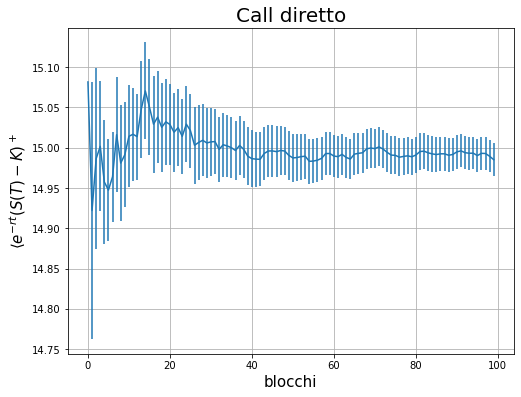

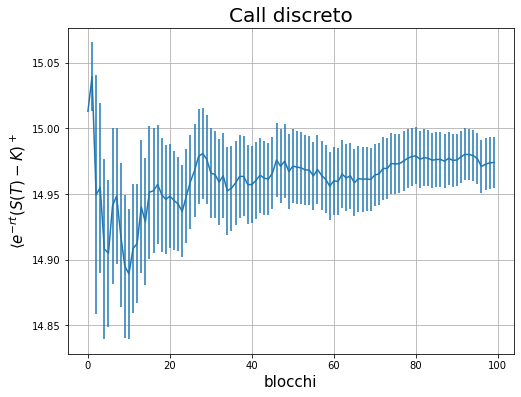

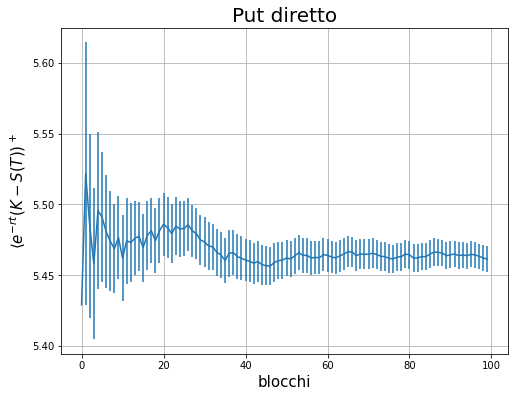

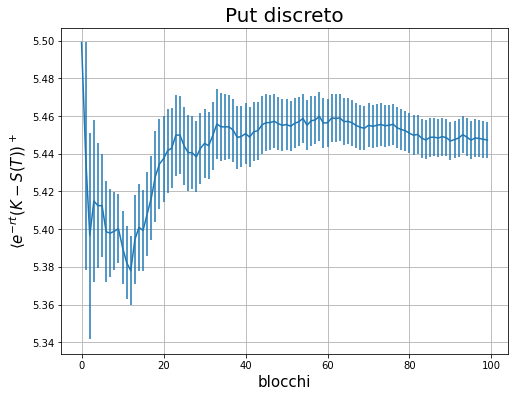

In [46]:
import matplotlib.pyplot as plt
import numpy as np

with open("Call_direct.dat") as out_CD:
    CD=np.loadtxt(out_CD,usecols=(0,1),dtype=float)

with open("Call_discr.dat") as out_Cd:
    Cd=np.loadtxt(out_Cd,usecols=(0,1),dtype=float)

with open("Put_direct.dat") as out_PD:
    PD=np.loadtxt(out_PD,usecols=(0,1),dtype=float)

with open("Put_discr.dat") as out_Pd:
    Pd=np.loadtxt(out_Pd,usecols=(0,1),dtype=float)
    
x=np.arange(100)

plt.figure(figsize=(8,6))
plt.errorbar(x,CD[:,0],yerr=CD[:,1])
plt.title("Call diretto",fontsize=20)
plt.xlabel("blocchi",fontsize=15)
plt.ylabel(r'$\langle e^{-rt}(S(T)-K)^+$',fontsize=15)
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.errorbar(x,Cd[:,0],yerr=Cd[:,1])
plt.title("Call discreto",fontsize=20)
plt.xlabel("blocchi",fontsize=15)
plt.ylabel(r'$\langle e^{-rt}(S(T)-K)^+$',fontsize=15)
plt.grid(True)
plt.show()


plt.figure(figsize=(8,6))
plt.errorbar(x,PD[:,0],yerr=PD[:,1])
plt.title("Put diretto",fontsize=20)
plt.xlabel("blocchi",fontsize=15)
plt.ylabel(r'$\langle e^{-rt}(K-S(T))^+$',fontsize=15)
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.errorbar(x,Pd[:,0],yerr=Pd[:,1])
plt.title("Put discreto",fontsize=20)
plt.xlabel("blocchi",fontsize=15)
plt.ylabel(r'$\langle e^{-rt}(K-S(T))^+$',fontsize=15)
plt.grid(True)
plt.show()


Riporto infine lo specchio python dell' esercitazione per confrontare i valori ottenuti numericamente con quelli attesi calcolati con le soluzioni analitiche di Black-Sholes.

In [47]:
import scipy
from scipy.special import erf
from numpy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)
    
print("\nNumerical solutions:\n")
print("call direct: ",CD[CD[:,0].size-1,0],"(",CD[CD[:,1].size-1,1],")")
print("call discretized: ",Cd[Cd[:,0].size-1,0],"(",Cd[Cd[:,1].size-1,1],")")
print("put direct: ",PD[PD[:,0].size-1,0],"(",PD[PD[:,1].size-1,1],")")
print("put discretized: ",Pd[Pd[:,0].size-1,0],"(",Pd[Pd[:,1].size-1,1],")")


 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364

Numerical solutions:

call direct:  14.9852 ( 0.0202323 )
call discretized:  14.9741 ( 0.0194185 )
put direct:  5.46133 ( 0.00894151 )
put discretized:  5.44729 ( 0.00961393 )
